## Necessary imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dojo.dimred import LinearDiscriminantAnalysis, PrincipalComponentAnalysis
from dojo.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

%matplotlib inline

## Loading data

In [2]:
iris = load_iris()
data = np.column_stack((iris["data"], iris["target"]))
np.random.shuffle(data)

X, y = data[:, :-1], data[:, -1]
y = LabelEncoder().fit_transform(y)

## Building the model and transforming the data

In [3]:
lda = LinearDiscriminantAnalysis(n_components=2)
pca = PrincipalComponentAnalysis(n_components=2)

X_lda = lda.fit_transform(X, y)
X_pca = pca.fit_transform(X)

## Visualize

In [4]:
label_dict = {
    0: "setosa",
    1: "versicolor",
    2: "virginica"
}

In [5]:
def plot_lda():
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants') 
    
    plt.grid()
    plt.show()

In [6]:
def plot_pca():
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0].real[y == label],
                y=X_pca[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Iris projection onto the first 2 principal components')
    
    plt.grid()
    plt.show()

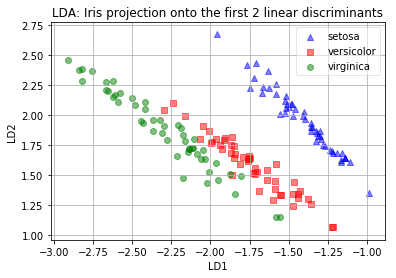

In [7]:
plot_lda()

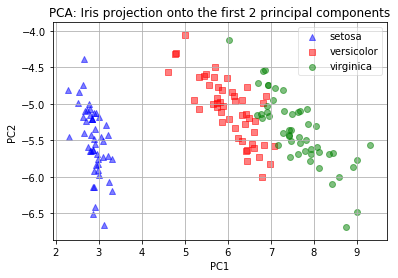

In [8]:
plot_pca()